In [ ]:
# ============================================
# 1. IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


# Load Dataset
We load the loan approval dataset and remove the column **name** since it does not contribute to prediction.


In [19]:
# ============================================
# 2. LOAD DATASET
# ============================================
df = pd.read_csv("loan_approval.csv")
df = df.drop("name", axis=1)
original_df = df.copy()
df = df.drop("points", axis=1)  # dropping 'points' column because it is perfectly separable which makes the accuracy 100%
df.head()


,city,income,credit_score,loan_amount,years_employed,loan_approved
0,East Jill,113810,389,39698,27,False
1,New Jamesside,44592,729,15446,28,False
2,Lake Roberto,33278,584,11189,13,False
3,West Melanieview,127196,344,48823,29,False
4,Mariastad,66048,496,47174,4,False


In [20]:
# ============================================
# 3. INSPECT DATA
# ============================================
print(df.info())
print(df.isnull().sum())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            2000 non-null   object
 1   income          2000 non-null   int64 
 2   credit_score    2000 non-null   int64 
 3   loan_amount     2000 non-null   int64 
 4   years_employed  2000 non-null   int64 
 5   loan_approved   2000 non-null   bool  
dtypes: bool(1), int64(4), object(1)
memory usage: 80.2+ KB
None
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
loan_approved     0
dtype: int64


,income,credit_score,loan_amount,years_employed
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000
std,34487.874907,160.564945,14207.320147,11.777813
min,30053.000000,300.000000,1022.000000,0.000000
25%,61296.250000,433.000000,12748.750000,10.000000
50%,90387.500000,576.000000,25661.500000,21.000000
75%,120099.750000,715.000000,37380.500000,31.000000
max,149964.000000,850.000000,49999.000000,40.000000


# Encode Target Variable
The column `loan_approved` contains TRUE/FALSE or strings. 
We convert it into binary values:  
- 1 → Approved  
- 0 → Not Approved


In [21]:
df["loan_approved"] = df["loan_approved"].astype(str).str.upper()

df["loan_approved"] = df["loan_approved"].map({
    "TRUE": 1,
    "FALSE": 0
})


# Define Features (X) and Target (y)
We separate the dataset into:
- X → input features  
- y → output label (loan_approved)


In [22]:
X = df.drop("loan_approved", axis=1)
y = df["loan_approved"]


In [23]:
cat_cols = ["city"]
num_cols = ["income", "credit_score", "loan_amount", "years_employed"]

cat_cols, num_cols


(['city'], ['income', 'credit_score', 'loan_amount', 'years_employed'])

# Train/Test Split
Split the dataset into training and testing sets using an 80/20 ratio.


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


# Train Logistic Regression Model
We fit Logistic Regression on the training data.


In [26]:
logreg_model = Pipeline([
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=500))
])

logreg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income', 'credit_score',
                                                   'loan_amount',
                                                   'years_employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city'])])),
                ('clf', LogisticRegression(max_iter=500))])

# Evaluate Logistic Regression
We print the classification report and accuracy score for Logistic Regression.


In [27]:
logreg_pred = logreg_model.predict(X_test)

print("🔹 Logistic Regression:\n")
print(classification_report(y_test, logreg_pred))
print("Accuracy:", accuracy_score(y_test, logreg_pred))


🔹 Logistic Regression:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       224
           1       0.95      0.91      0.93       176

    accuracy                           0.94       400
   macro avg       0.94      0.93      0.94       400
weighted avg       0.94      0.94      0.94       400

Accuracy: 0.9375


# Train Support Vector Machine (SVM) Models
We train two SVM models:
- **Hard Margin SVM**: C = 1e10 (very large C means minimal tolerance for misclassification)
- **Soft Margin SVM With RBF Kernal**: C = 1.0 (allows some misclassification for better generalization)


In [28]:
# Hard Margin SVM (C = very large value, almost no tolerance for errors)
svm_hard_margin = Pipeline([
    ("preprocess", preprocess),
    ("clf", LinearSVC(C=1e10, max_iter=5000))  # Very large C for hard margin
])

svm_hard_margin.fit(X_train, y_train)


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income', 'credit_score',
                                                   'loan_amount',
                                                   'years_employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city'])])),
                ('clf', LinearSVC(C=10000000000.0, max_iter=5000))])

In [29]:
# Soft Margin SVM (C = 1.0, allows some misclassification)
svm_soft_margin = Pipeline([
    ("preprocess", preprocess),
    ("clf", SVC(kernel= "rbf", C = 1))  # Default C for soft margin
])

svm_soft_margin.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['income', 'credit_score',
                                                   'loan_amount',
                                                   'years_employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city'])])),
                ('clf', SVC(C=1))])

# Evaluate Hard Margin SVM
We print the classification report and accuracy for the hard margin SVM model.


In [30]:
svm_hard_pred = svm_hard_margin.predict(X_test)

print("🔹 Hard Margin SVM (C=1e10):\n")
print(classification_report(y_test, svm_hard_pred))
print("Accuracy:", accuracy_score(y_test, svm_hard_pred))


🔹 Hard Margin SVM (C=1e10):

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       224
           1       0.94      0.92      0.93       176

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Accuracy: 0.9375


# Evaluate Soft Margin With RBF Kernal
We print the classification report and accuracy for the soft margin SVM model.


In [31]:
svm_soft_pred = svm_soft_margin.predict(X_test)

print("🔹 Soft Margin SVM With RBF Kernel (C=1.0):\n")
print(classification_report(y_test, svm_soft_pred))
print("Accuracy:", accuracy_score(y_test, svm_soft_pred))


🔹 Soft Margin SVM With RBF Kernel (C=1.0):

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       224
           1       0.98      0.97      0.97       176

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Accuracy: 0.9775


# Compare models
Plot confusion matrices for all models

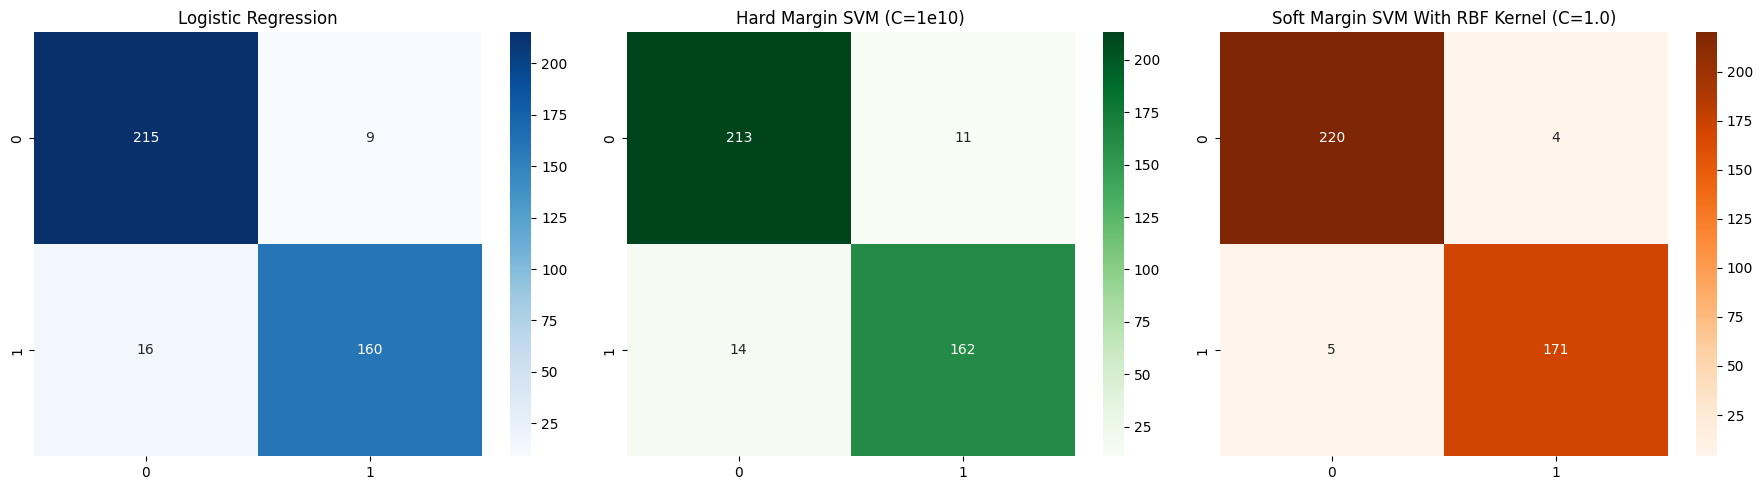

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(confusion_matrix(y_test, svm_hard_pred), annot=True, cmap="Greens", fmt="d", ax=axes[1])
axes[1].set_title("Hard Margin SVM (C=1e10)")

sns.heatmap(confusion_matrix(y_test, svm_soft_pred), annot=True, cmap="Oranges", fmt="d", ax=axes[2])
axes[2].set_title("Soft Margin SVM With RBF Kernel (C=1.0)")

plt.tight_layout()
plt.show()


In [33]:
print("====================================")
print("Model Comparison")
print("====================================")
print("Logistic Regression:", accuracy_score(y_test, logreg_pred))
print("Hard Margin SVM (C=1e10):", accuracy_score(y_test, svm_hard_pred))
print("Soft Margin SVM With RBF Kernel (C=1.0):", accuracy_score(y_test, svm_soft_pred))


Model Comparison
Logistic Regression: 0.9375
Hard Margin SVM (C=1e10): 0.9375
Soft Margin SVM With RBF Kernel (C=1.0): 0.9775


# Check separability using pairplot
Accuracy was 1 in both models so we are checking if the clusters are perfectly seprated or there is an issue, after seeing this we dropped the "points" column so we can compare models

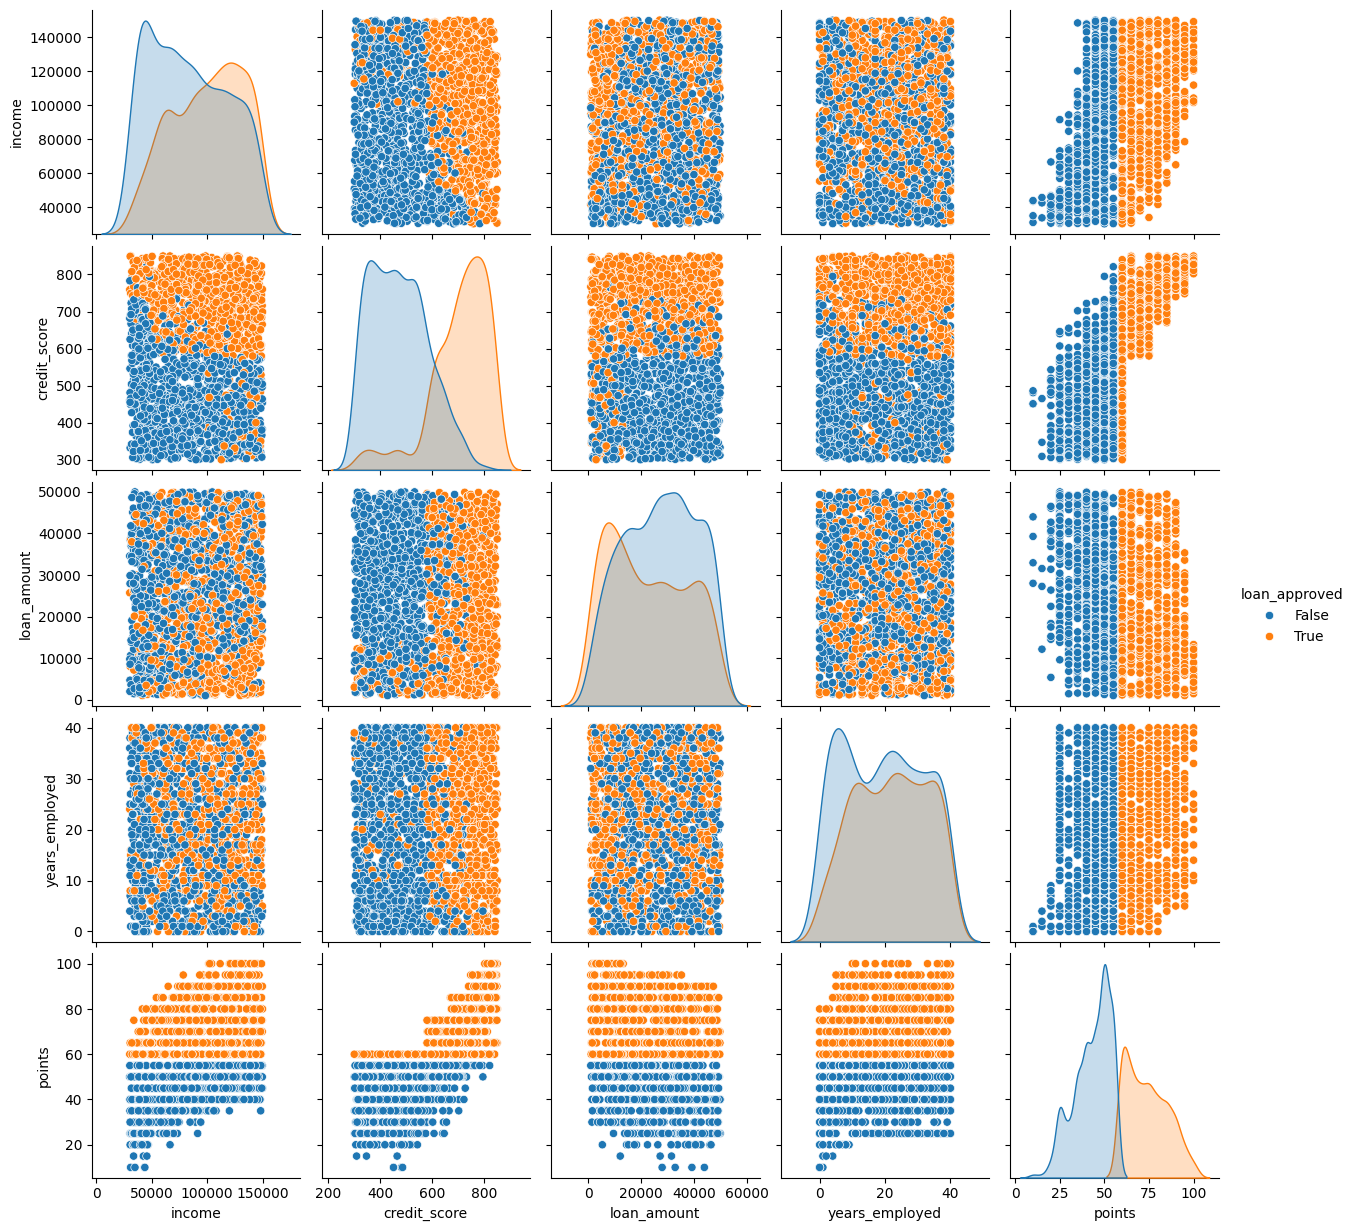

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(original_df[['income','credit_score','loan_amount','years_employed','loan_approved','points']], 
             hue='loan_approved')
plt.show()


It clearly shows that points and credit score features are perfectly seperable so it is normal that the accuracy was 1